In [ ]:
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the path to your dataset folder
dataset_path = '/content/drive/MyDrive/Modi Letters Project/dataset/line_dataset.zip'  # Replace with the actual path

# Check if the dataset folder exists
if os.path.exists(dataset_path):
  print(f"Dataset folder found at: {dataset_path}")
else:
  print(f"Dataset folder not found at: {dataset_path}. Please make sure the path is correct.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset folder found at: /content/drive/MyDrive/Modi Letters Project/dataset/line_dataset.zip


In [ ]:
!unzip "/content/adnan2 (1).zip" -d /content/dataset/dataset

Archive:  /content/adnan2 (1).zip
   creating: /content/dataset/dataset/adnan2/
  inflating: /content/dataset/dataset/adnan2/pdf1text1-1.png  
  inflating: /content/dataset/dataset/adnan2/pdf1text1-1.txt  
  inflating: /content/dataset/dataset/adnan2/pdf1text1-10.png  
  inflating: /content/dataset/dataset/adnan2/pdf1text1-10.txt  
  inflating: /content/dataset/dataset/adnan2/pdf1text1-11.png  
  inflating: /content/dataset/dataset/adnan2/pdf1text1-11.txt  
  inflating: /content/dataset/dataset/adnan2/pdf1text1-12.png  
  inflating: /content/dataset/dataset/adnan2/pdf1text1-12.txt  
  inflating: /content/dataset/dataset/adnan2/pdf1text1-13.png  
  inflating: /content/dataset/dataset/adnan2/pdf1text1-13.txt  
  inflating: /content/dataset/dataset/adnan2/pdf1text1-14.png  
  inflating: /content/dataset/dataset/adnan2/pdf1text1-14.txt  
  inflating: /content/dataset/dataset/adnan2/pdf1text1-15.png  
  inflating: /content/dataset/dataset/adnan2/pdf1text1-15.txt  
  inflating: /content/data

## RENAME

In [ ]:
import os
import re

# Set the folder path
folder_path = "dataset/dataset"

# Regex pattern to remove text within parentheses and spaces
pattern = re.compile(r"\s*\([^)]*\)\s*")

for folder in os.listdir(folder_path):
    new_folder_path = os.path.join(folder_path, folder)
    for filename in os.listdir(new_folder_path):
        old_path = os.path.join(new_folder_path ,filename)
        # print(old_path)
        # Skip directories
        if not os.path.isfile(old_path):
            continue

        # Remove text inside parentheses and spaces
        new_name = pattern.sub("", filename)

        # Remove any remaining spaces
        new_name = new_name.replace(" ", "")

        new_path = os.path.join(new_folder_path, new_name)

        # Rename the file only if the name has changed
        if old_path != new_path:
            os.rename(old_path, new_path)
            print(f"Renamed: {filename} -> {new_name}")


## MERGE DATASET


In [ ]:
import os
import shutil

dataset = r"dataset/dataset"
source_folders = []

for folder in os.listdir(dataset):
    source_folders.append(os.path.join(dataset, folder))


# Define destination folder
destination_folder = r"merged_dataset"
os.makedirs(destination_folder, exist_ok=True)

# Function to copy and rename files
def merge_datasets(source_folders, destination_folder):
    for folder in source_folders:
        folder_name = os.path.basename(folder)

        for file in os.listdir(folder):
            if file.endswith(('.png', '.jpg', '.jpeg')):
                base_name, ext = os.path.splitext(file)
                label_file = base_name + ".txt"

                # Create unique names to avoid conflicts
                new_image_name = f"{folder_name}_{file}"
                new_label_name = f"{folder_name}_{label_file}"

                img_src_path = os.path.join(folder, file)
                label_src_path = os.path.join(folder, label_file)

                img_dest_path = os.path.join(destination_folder, new_image_name)
                label_dest_path = os.path.join(destination_folder, new_label_name)

                # Copy image and label if label exists
                shutil.copy(img_src_path, img_dest_path)
                if os.path.exists(label_src_path):
                    shutil.copy(label_src_path, label_dest_path)

                print(f"Copied: {file} -> {new_image_name}")
                print(f"Copied: {label_file} -> {new_label_name}")

# Run the merge function
merge_datasets(source_folders, destination_folder)

print("\n✅ Dataset merging completed! All files are in:", destination_folder)


Copied: page63-2.png -> adnan_page63-2.png
Copied: page63-2.txt -> adnan_page63-2.txt
Copied: page19-4.jpg -> adnan_page19-4.jpg
Copied: page19-4.txt -> adnan_page19-4.txt
Copied: page59-9.png -> adnan_page59-9.png
Copied: page59-9.txt -> adnan_page59-9.txt
Copied: page23-7.jpg -> adnan_page23-7.jpg
Copied: page23-7.txt -> adnan_page23-7.txt
Copied: page57-19.png -> adnan_page57-19.png
Copied: page57-19.txt -> adnan_page57-19.txt
Copied: page49-2.png -> adnan_page49-2.png
Copied: page49-2.txt -> adnan_page49-2.txt
Copied: page63-5.png -> adnan_page63-5.png
Copied: page63-5.txt -> adnan_page63-5.txt
Copied: page53-12.png -> adnan_page53-12.png
Copied: page53-12.txt -> adnan_page53-12.txt
Copied: page49-7.png -> adnan_page49-7.png
Copied: page49-7.txt -> adnan_page49-7.txt
Copied: page57-9.png -> adnan_page57-9.png
Copied: page57-9.txt -> adnan_page57-9.txt
Copied: page73-1.png -> adnan_page73-1.png
Copied: page73-1.txt -> adnan_page73-1.txt
Copied: page51-5.png -> adnan_page51-5.png
Cop

## DELETE

In [ ]:
import os
import shutil

folder_to_delete = "/content/merged_dataset"

# Check if the folder exists
if os.path.exists(folder_to_delete):
    try:
        shutil.rmtree(folder_to_delete)
        print(f"Folder '{folder_to_delete}' and its contents have been successfully deleted.")
    except OSError as e:
        print(f"Error deleting folder '{folder_to_delete}': {e}")
else:
    print(f"Folder '{folder_to_delete}' does not exist.")


Folder '/content/merged_dataset' and its contents have been successfully deleted.


## UNZIP

In [ ]:
!unzip "/content/adnan2.zip" -d "/content/dataset/dataset"

Archive:  /content/adnan2.zip
   creating: /content/dataset/dataset/adnan2/
  inflating: /content/dataset/dataset/adnan2/pdf1text1-1.png  
  inflating: /content/dataset/dataset/adnan2/pdf1text1-1.txt  
  inflating: /content/dataset/dataset/adnan2/pdf1text1-10.png  
  inflating: /content/dataset/dataset/adnan2/pdf1text1-10.txt  
  inflating: /content/dataset/dataset/adnan2/pdf1text1-11.png  
  inflating: /content/dataset/dataset/adnan2/pdf1text1-11.txt  
  inflating: /content/dataset/dataset/adnan2/pdf1text1-12.png  
  inflating: /content/dataset/dataset/adnan2/pdf1text1-12.txt  
  inflating: /content/dataset/dataset/adnan2/pdf1text1-13.png  
  inflating: /content/dataset/dataset/adnan2/pdf1text1-13.txt  
  inflating: /content/dataset/dataset/adnan2/pdf1text1-14.png  
  inflating: /content/dataset/dataset/adnan2/pdf1text1-14.txt  
  inflating: /content/dataset/dataset/adnan2/pdf1text1-15.png  
  inflating: /content/dataset/dataset/adnan2/pdf1text1-15.txt  
  inflating: /content/dataset/

## MOVE

In [ ]:
import shutil

source_folder = "dataset/dataset/dataset"
destination_folder = "dataset/dataset"

# Check if the source folder exists
if os.path.exists(source_folder):
    try:
        # Iterate through files and folders in the source directory
        for item in os.listdir(source_folder):
            source_item_path = os.path.join(source_folder, item)
            destination_item_path = os.path.join(destination_folder, item)

            # Check if it's a directory
            if os.path.isdir(source_item_path):
                # Recursively move the subdirectory and its contents
                shutil.move(source_item_path, destination_folder)
                print(f"Moved directory: {source_item_path} to {destination_folder}")

            # Check if it's a file
            elif os.path.isfile(source_item_path):
                # Move the file to the destination directory
                shutil.move(source_item_path, destination_folder)
                print(f"Moved file: {source_item_path} to {destination_folder}")

        # Remove the now-empty source directory
        os.rmdir(source_folder)
        print(f"Removed empty directory: {source_folder}")

    except OSError as e:
        print(f"Error moving or deleting: {e}")
else:
    print(f"Source folder '{source_folder}' does not exist.")


Moved directory: dataset/dataset/dataset/Translation2 to dataset/dataset
Moved directory: dataset/dataset/dataset/Translation to dataset/dataset
Moved directory: dataset/dataset/dataset/translations to dataset/dataset
Moved directory: dataset/dataset/dataset/adnan to dataset/dataset
Moved directory: dataset/dataset/dataset/Translation1 to dataset/dataset
Moved directory: dataset/dataset/dataset/Translation3 to dataset/dataset
Moved directory: dataset/dataset/dataset/Translation4 to dataset/dataset
Moved directory: dataset/dataset/dataset/Translation5 to dataset/dataset
Removed empty directory: dataset/dataset/dataset


## MODEL TRAINING

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import pickle
import seaborn as sns
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Bidirectional, LSTM, Dense, Reshape, BatchNormalization, Input, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import glob
import matplotlib.pyplot as plt

In [ ]:
# Image Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.1,
    fill_mode='nearest'
)

In [ ]:
def load_data(folder_path, augment=True):
    print(f"\nLoading data from folder: {folder_path}")
    images, labels = [], []
    file_list = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg'))]
    print(f"Found {len(file_list)} image files")

    for file in tqdm(file_list, desc="Processing images"):
        img_path = os.path.join(folder_path, file)
        label_path = os.path.join(folder_path, file.rsplit('.', 1)[0] + ".txt")

        if os.path.exists(label_path):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                print(f"Warning: Could not load image {img_path}")
                continue

            img = cv2.resize(img, (128, 32))
            img = img_to_array(img) / 255.0
            images.append(img)

            with open(label_path, 'r', encoding='utf-8') as f:
                label = f.readline().strip()
                labels.append(label)

            # Augment Data
            if augment:
                img = np.expand_dims(img, axis=0)  # Expand dims for augmentation
                aug_iter = datagen.flow(img, batch_size=1)
                for _ in range(30):  # Generate 30 augmented images per original
                    aug_img = next(aug_iter)[0]
                    images.append(aug_img)
                    labels.append(label)

    print(f"Total processed images: {len(images)}")
    return np.array(images), labels


In [ ]:
def build_model(vocab_size, max_seq_len):
    input_layer = Input(shape=(32, 128, 1))

    x = Conv2D(64, (3,3), activation='relu', padding='same')(input_layer)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = BatchNormalization()(x)

    x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = BatchNormalization()(x)

    x = Conv2D(256, (3,3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = BatchNormalization()(x)

    x = Reshape((max_seq_len, 1024))(x)

    #x = Flatten()(x)
    #x = Dense(max_seq_len * 256)(x)
    #x = Reshape((max_seq_len, 256))(x)

    x = Bidirectional(LSTM(256, return_sequences=True))(x)
    x = Bidirectional(LSTM(128, return_sequences=True))(x)

    output_layer = Dense(vocab_size, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

In [ ]:
def preprocess_labels(labels):
    print("\nTokenizing labels...")

    tokenizer = Tokenizer(char_level=True, filters='', oov_token=None)
    tokenizer.fit_on_texts(labels)

    vocab_size = len(tokenizer.word_index) + 1
    print(f"Vocabulary size: {vocab_size}")

    y_encoded = tokenizer.texts_to_sequences(labels)
    max_seq_len = 256

    y_padded = tf.keras.preprocessing.sequence.pad_sequences(y_encoded, maxlen=max_seq_len, padding='post', truncating='post')
    y_categorical = np.array([to_categorical(seq, num_classes=vocab_size) for seq in y_padded])

    return y_categorical, tokenizer, vocab_size, max_seq_len

In [ ]:
def get_next_filename(folder, base_name, extension):
    os.makedirs(folder, exist_ok=True)
    existing_files = glob.glob(os.path.join(folder, f"{base_name}_*.{extension}"))
    file_numbers = [int(f.split("_")[-1].split(".")[0]) for f in existing_files if f.split("_")[-1].split(".")[0].isdigit()]
    next_file_number = max(file_numbers) + 1 if file_numbers else 1
    return os.path.join(folder, f"{base_name}_{next_file_number}.{extension}")

In [ ]:
print("Starting OCR model training pipeline...")
folder_path = r"merged_dataset"
X, y = load_data(folder_path)
print(f"\nDataset shape - Images: {X.shape}")

y_categorical, tokenizer, vocab_size, max_seq_len = preprocess_labels(y)
print(f"Label shape after processing: {y_categorical.shape}")

Starting OCR model training pipeline...

Loading data from folder: merged_dataset
Found 865 image files


Processing images: 100%|██████████| 865/865 [00:19<00:00, 45.46it/s]


Total processed images: 26288

Dataset shape - Images: (26288, 32, 128, 1)

Tokenizing labels...
Vocabulary size: 82
Label shape after processing: (26288, 16, 82)


In [ ]:
model = build_model(vocab_size, max_seq_len)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 128, 1)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 128, 64)         │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 32, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 32, 128)          │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 32, 256)          │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 16, 256)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 4, 16, 256)          │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 16, 1024)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 16, 512)             │       2,623,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 16, 256)             │         656,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16, 82)              │          21,074 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,672,402 (14.01 MB)

 Trainable params: 3,671,506 (14.01 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y_categorical, test_size=0.3, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42, shuffle=True)

log_filename = get_next_filename("logs", "training_log", "csv")
model_filename = get_next_filename("models", "best_model", "keras")
tokenizer_filename = get_next_filename("tokenizers", "tokenizer", "pkl")
history_filename = get_next_filename("history_logs", "history_log", "pkl")

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1,
    callbacks=[
        tf.keras.callbacks.CSVLogger(log_filename),
        tf.keras.callbacks.ModelCheckpoint(
            model_filename,
            save_best_only=True,
            monitor='val_accuracy'
        )
    ]
)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=-1)
y_true_classes = np.argmax(y_test, axis=-1)

Epoch 1/50
576/576 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.5977 - loss: 1.7120

In [ ]:
history_data = {
    "y_pred": y_pred.tolist(),
    "y_pred_classes": y_pred_classes.tolist(),
    "y_true_classes": y_true_classes.tolist(),
    "history": history.history
}

In [ ]:
with open(history_filename, "wb") as f:
    pickle.dump(history_data, f)
print(f"History log saved as '{history_filename}'")


with open(tokenizer_filename, "wb") as f:
    pickle.dump(tokenizer, f)
print(f"Tokenizer saved as '{tokenizer_filename}'")

## CER, WER

In [ ]:
!pip install Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.1 MB/s eta 0:00:00


In [ ]:
import Levenshtein

def calculate_wer_cer(y_true_texts, y_pred_texts):
    total_words, total_chars = 0, 0
    word_errors, char_errors = 0, 0

    for true_text, pred_text in zip(y_true_texts, y_pred_texts):
        true_words = true_text.split()
        pred_words = pred_text.split()

        word_errors += Levenshtein.distance(true_text, pred_text)
        char_errors += Levenshtein.distance(" ".join(true_words), " ".join(pred_words))
        total_words += len(true_words)
        total_chars += len(true_text)

    wer = word_errors / total_words if total_words else 0
    cer = char_errors / total_chars if total_chars else 0

    return wer, cer

In [ ]:
# Convert predicted indices to text
y_pred_texts = ["".join(tokenizer.sequences_to_texts([seq])) for seq in y_pred_classes]
y_true_texts = ["".join(tokenizer.sequences_to_texts([seq])) for seq in y_true_classes]

# Calculate WER & CER
wer, cer = calculate_wer_cer(y_true_texts, y_pred_texts)
print(f"Word Error Rate (WER): {wer:.4f}")
print(f"Character Error Rate (CER): {cer:.4f}")

Word Error Rate (WER): 0.3099
Character Error Rate (CER): 0.1601


In [ ]:
from tensorflow.keras.models import load_model

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=-1)
y_true_classes = np.argmax(y_test, axis=-1)

82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [ ]:
def write_predictions_to_file(X_test, y_test, y_pred_texts, filename="predictions.txt"):
    with open(filename, "w", encoding="utf-8") as f:
        for i in range(len(X_test)):
            f.write(f"Predicted: {y_pred_texts[i]}\n")
            f.write(f"Actual   : {y_true_texts[i]}\n\n")


write_predictions_to_file(X_test, y_test, y_pred_texts)

## CUSTOM RUN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import cv2
import numpy as np
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array


model = load_model(r"models/best_model_1.keras")


with open(r"tokenizers/tokenizer_1.pkl", "rb") as f:
    tokenizer = pickle.load(f)


def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    img = cv2.resize(img, (128, 32))  # Resize to model input size
    img = img_to_array(img) / 255.0  # Normalize (convert to 0-1 range)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img  # Shape: (1, 32, 128, 1)

def decode_prediction(prediction, tokenizer):
    predicted_sequence = np.argmax(prediction, axis=-1)[0]  # Get most probable class indices
    predicted_text = ''.join(tokenizer.index_word[idx] for idx in predicted_sequence if idx in tokenizer.index_word)
    return predicted_text


def run_ocr(image_path):
    input_img = preprocess_image(image_path)  # Preprocess input image
    prediction = model.predict(input_img)  # Get model prediction
    predicted_text = decode_prediction(prediction, tokenizer)  # Convert to text
    return predicted_text

if __name__ == "__main__":
    image_path = "test_image.png"  # Change this to your test image
    result = run_ocr(image_path)

    # Append result to text file
    with open("ocr_result.txt", "a", encoding="utf-8") as f:
        f.write(result + "\n")

    print("OCR result appended to ocr_result.txt. Result:", result)

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
import shutil

# Define source folders and destination path on Google Drive
source_folders = ["history_logs", "logs", "models", "prediction_logs", "tokenizers"]
destination_path = "/content/drive/MyDrive/Modi Letters Project/models/crnn" # Update with your desired path

# Create the destination folder if it doesn't exist
!mkdir -p "$destination_path"

# Iterate through source folders and copy them to the destination
for folder in source_folders:
  if os.path.exists(folder):
    source_folder_path = os.path.abspath(folder)
    destination_folder_path = os.path.join(destination_path, folder)
    print(f"Copying '{source_folder_path}' to '{destination_folder_path}'")
    shutil.copytree(source_folder_path, destination_folder_path, dirs_exist_ok=True)
  else:
    print(f"Warning: Source folder '{folder}' not found.")


Copying '/content/history_logs' to '/content/drive/MyDrive/Modi Letters Project/models/crnn/history_logs'
Copying '/content/logs' to '/content/drive/MyDrive/Modi Letters Project/models/crnn/logs'
Copying '/content/models' to '/content/drive/MyDrive/Modi Letters Project/models/crnn/models'
Copying '/content/prediction_logs' to '/content/drive/MyDrive/Modi Letters Project/models/crnn/prediction_logs'
Copying '/content/tokenizers' to '/content/drive/MyDrive/Modi Letters Project/models/crnn/tokenizers'


In [ ]:
!pip install fitz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.4/95.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 111.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.7 MB/s eta 0:00:00


In [ ]:
!pip install tools

Saving image_2025-06-18_131447869.png to image_2025-06-18_131447869.png
Uploaded file: image_2025-06-18_131447869.png
Saved uploaded file to uploads/image_2025-06-18_131447869.png.
Created new folder for line segmentation: line_segmentation/2


--- Starting Image Processing for: uploads/image_2025-06-18_131447869.png ---
Loaded image: uploads/image_2025-06-18_131447869.png, Shape: (420, 980, 3)


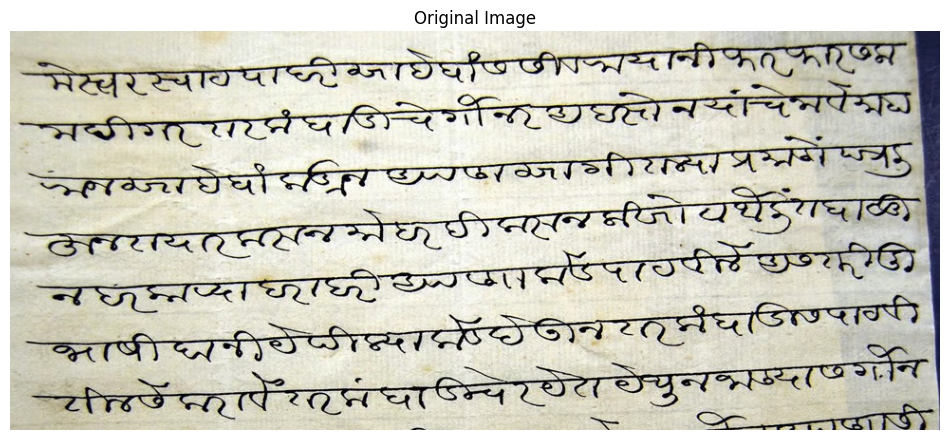

Converted image to grayscale.


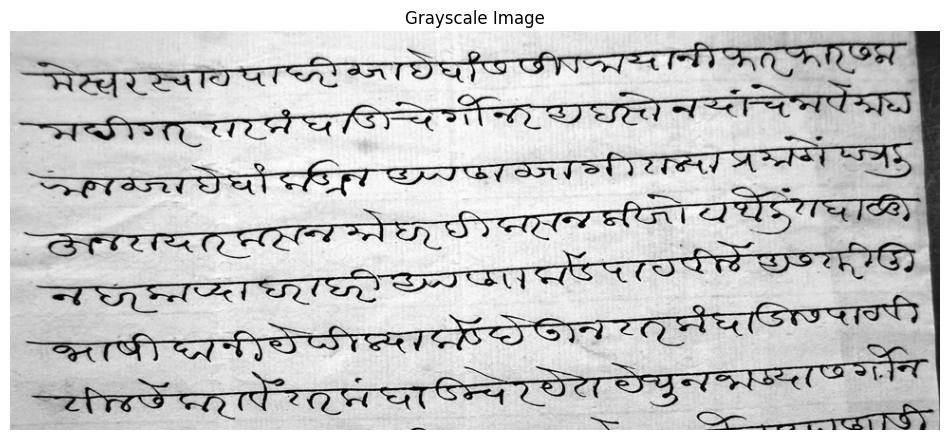

Applied binary threshold (THRESH_BINARY_INV + OTSU).


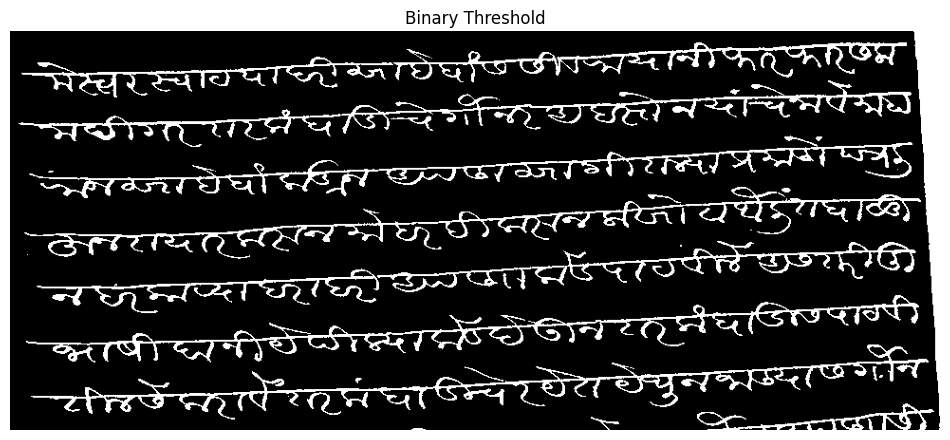

Dilated the image to connect components.


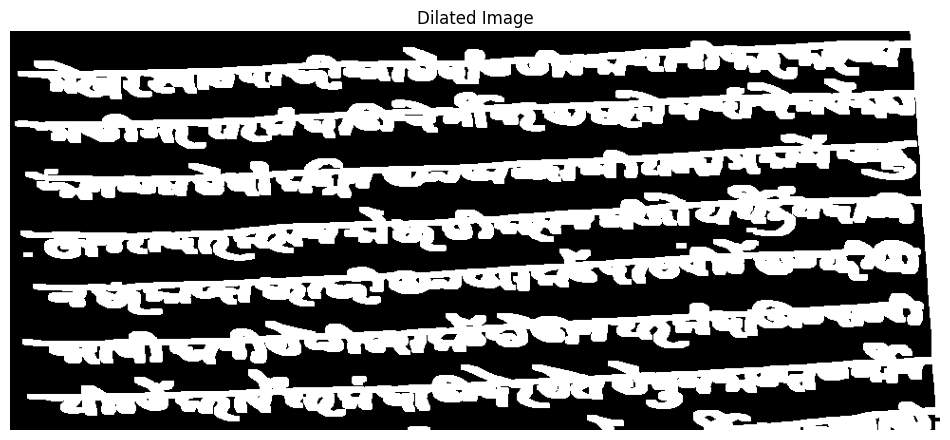

Found 10 contours.
Sorted contours by vertical position.
Width is greater than 250, processing contour...
Saved line 1 to line_segmentation/2/line_1_folder/line_1.png.
Width is greater than 250, processing contour...
Saved line 2 to line_segmentation/2/line_2_folder/line_2.png.
Width is greater than 250, processing contour...
Saved line 3 to line_segmentation/2/line_3_folder/line_3.png.
Skipping contour 4 as width is less than or equal to 250.
Skipping contour 5 as width is less than or equal to 250.
Width is greater than 250, processing contour...
Saved line 6 to line_segmentation/2/line_6_folder/line_6.png.
Skipping contour 7 as width is less than or equal to 250.
Skipping contour 8 as width is less than or equal to 250.
Skipping contour 9 as width is less than or equal to 250.
Skipping contour 10 as width is less than or equal to 250.

--- Finished Processing Image ---



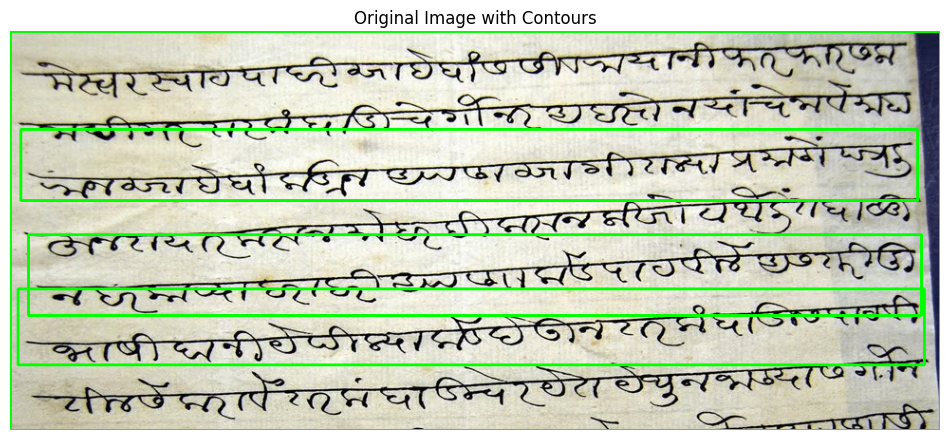

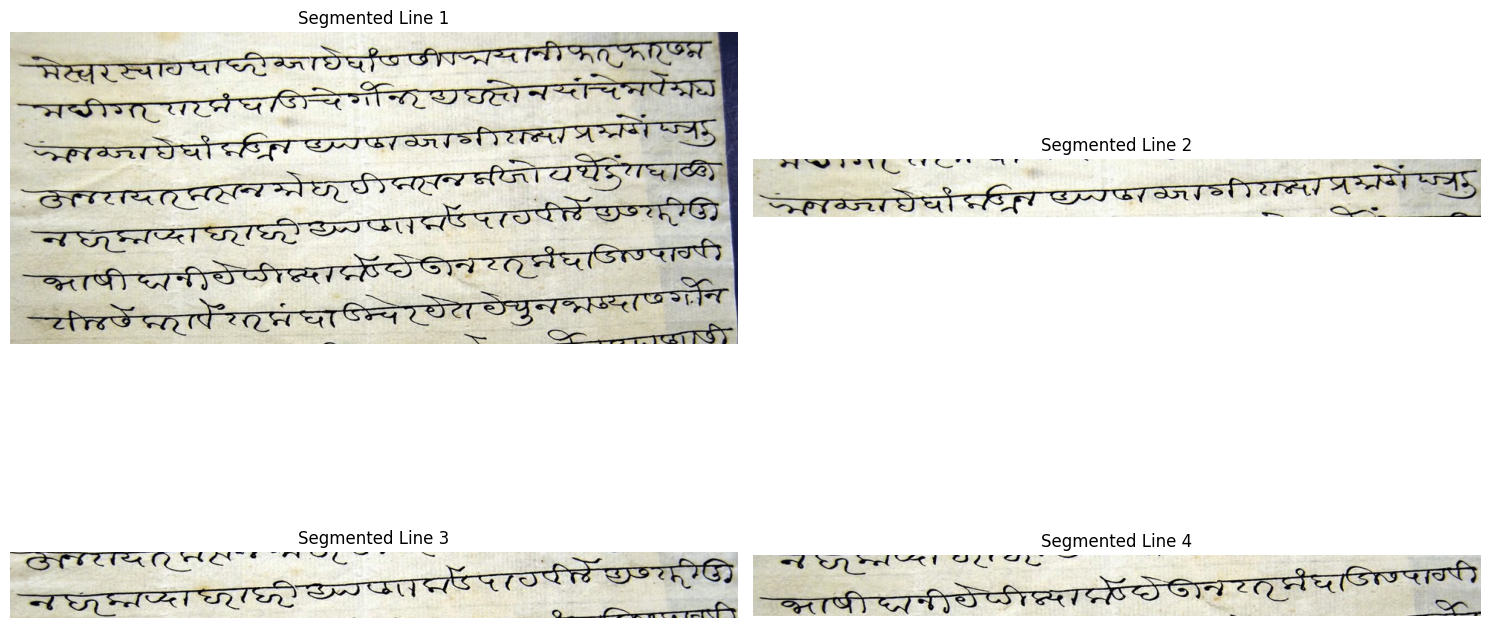

In [ ]:
import cv2
import numpy as np
import os
from google.colab import files
import fitz  # PyMuPDF
import matplotlib.pyplot as plt

def upload_document():
    # Upload a document (image or PDF) using Google Colab's files.upload() method
    uploaded = files.upload()
    for filename in uploaded.keys():
        print(f'Uploaded file: {filename}')
        return filename

# Folders for uploaded images and line segmentation output
UPLOAD_FOLDER = 'uploads'
LINE_SEGMENTATION_FOLDER = 'line_segmentation'

# Create directories if they don't exist
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
os.makedirs(LINE_SEGMENTATION_FOLDER, exist_ok=True)

def get_next_subfolder(base_folder):
    # Generate the next available folder number for saving line images
    existing_folders = [int(f) for f in os.listdir(base_folder) if os.path.isdir(os.path.join(base_folder, f)) and f.isdigit()]
    existing_folders.sort()

    if not existing_folders:
        return os.path.join(base_folder, '1')

    next_folder_num = existing_folders[-1] + 1
    return os.path.join(base_folder, str(next_folder_num))

def display_image(title, image):
    # Display images in Google Colab using Matplotlib
    plt.figure(figsize=(12, 8))
    if len(image.shape) == 2:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def process_image(image_path, output_folder):
    print(f"\n\n--- Starting Image Processing for: {image_path} ---")

    # Step 1: Load the image or document
    img = None
    if image_path.lower().endswith('.pdf'):
        # If it's a PDF, convert the first page to an image
        doc = fitz.open(image_path)
        page = doc.load_page(0)  # Get the first page
        pix = page.get_pixmap()

        # Get the image data and print its size for debugging
        sample_data = np.frombuffer(pix.samples, dtype=np.uint8)
        print(f"Sample data length: {len(sample_data)}")  # Print the length of the data
        print(f"Expected shape: ({pix.height}, {pix.width}, 4)")

        # Verify if the sample data can be reshaped
        if len(sample_data) == pix.height * pix.width * 4:
            img = sample_data.reshape(pix.height, pix.width, 4)  # Correctly reshape the data
            print(f"Successfully reshaped the image data.")
        else:
            print("Error: The sample data size does not match the expected dimensions.")

        print(f"Loaded PDF and converted first page to image.")
    else:
        # Otherwise, assume it's an image (png, jpg)
        img = cv2.imread(image_path)
        if img is None:
            print(f"Error: Unable to load image from {image_path}.")
            return
        print(f"Loaded image: {image_path}, Shape: {img.shape}")

    display_image("Original Image", img)

    # Step 2: Convert to Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print(f"Converted image to grayscale.")
    display_image("Grayscale Image", gray)

    # Step 3: Apply Binary Threshold
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    print(f"Applied binary threshold (THRESH_BINARY_INV + OTSU).")
    display_image("Binary Threshold", thresh)

    # Step 4: Dilate the image to connect components (adjust kernel size to better detect lines)
    kernel = np.ones((5, 10), np.uint8)  # Adjust kernel size to detect horizontal text lines
    dilated = cv2.dilate(thresh, kernel, iterations=1)
    print(f"Dilated the image to connect components.")
    display_image("Dilated Image", dilated)

    # Step 5: Find contours of the dilated image
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    print(f"Found {len(contours)} contours.")

    # Step 6: Sort contours based on the y-coordinate to maintain order
    contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[1])
    print(f"Sorted contours by vertical position.")

    # Prepare to draw contours
    img_with_contours = img.copy()

    # Step 7: Process each contour (line segmentation)
    segmented_images = []
    for i, contour in enumerate(contours):
        x, y, w, h = cv2.boundingRect(contour)

        # Only process and save the line if its width is greater than 250
        if w > 250:
            print(f"Width is greater than 250, processing contour...")

            # Expand the bounding box slightly
            x = max(0, x - 5)
            y = max(0, y - 5)
            w = min(img.shape[1] - x, w + 5)
            h = min(img.shape[0] - y, h + 5)

            # Extract the line from the image
            line = img[y:y+h, x:x+w]

            # Draw the contour on the image
            cv2.rectangle(img_with_contours, (x, y), (x+w, y+h), (0, 255, 0), 2)

            # Create a folder for each line
            line_folder = os.path.join(output_folder, f'line_{i+1}_folder')
            os.makedirs(line_folder, exist_ok=True)
            line_path = os.path.join(line_folder, f'line_{i+1}.png')
            cv2.imwrite(line_path, line)
            print(f"Saved line {i+1} to {line_path}.")

            # Append the segmented image to the list
            segmented_images.append(line)
        else:
            print(f"Skipping contour {i+1} as width is less than or equal to 250.")

    print("\n--- Finished Processing Image ---\n")

    # Display the original image with contours
    display_image("Original Image with Contours", img_with_contours)

    # Display segmented images
    display_segmented_images(segmented_images)

def display_segmented_images(segmented_images):
    """Display all segmented images in a grid."""
    num_images = len(segmented_images)
    cols = 2
    rows = (num_images + cols - 1) // cols

    plt.figure(figsize=(15, 5 * rows))
    for i, img in enumerate(segmented_images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f'Segmented Line {i + 1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def main():
    uploaded_filename = upload_document()

    uploaded_image_path = os.path.join(UPLOAD_FOLDER, uploaded_filename)
    os.rename(uploaded_filename, uploaded_image_path)

    print(f"Saved uploaded file to {uploaded_image_path}.")

    next_line_folder = get_next_subfolder(LINE_SEGMENTATION_FOLDER)
    os.makedirs(next_line_folder, exist_ok=True)
    print(f"Created new folder for line segmentation: {next_line_folder}")

    process_image(uploaded_image_path, next_line_folder)

main()

In [ ]:
import cv2
import numpy as np
import os
from google.colab import files
import zipfile

# Upload images via Colab
uploaded = files.upload()

# Output directory
LINE_SEGMENTATION_FOLDER = 'segmented_lines'
os.makedirs(LINE_SEGMENTATION_FOLDER, exist_ok=True)

def process_image(image_name, image_data, output_folder):
    """Process the image to segment lines and save them."""
    # Read the image from bytes
    file_bytes = np.frombuffer(image_data, np.uint8)
    img = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)

    if img is None:
        print(f"Failed to load {image_name}")
        return

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Binary threshold
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Dilate to connect components
    kernel = np.ones((5, 10), np.uint8)
    dilated = cv2.dilate(thresh, kernel, iterations=1)

    # Find contours
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort by y-coordinate
    contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[1])

    base_name = os.path.splitext(image_name)[0]
    subfolder = os.path.join(output_folder, base_name)
    os.makedirs(subfolder, exist_ok=True)

    # Extract and save each line
    for i, contour in enumerate(contours):
        x, y, w, h = cv2.boundingRect(contour)
        if w > 250 and h > 100:
            x = max(0, x - 5)
            y = max(0, y - 5)
            w = min(img.shape[1] - x, w + 20)
            h = min(img.shape[0] - y, h + 20)
            line = img[y:y+h, x:x+w]
            line_path = os.path.join(subfolder, f'line_{i+1}.png')
            cv2.imwrite(line_path, line)

def segment_uploaded_images():
    for image_name, image_data in uploaded.items():
        process_image(image_name, image_data, LINE_SEGMENTATION_FOLDER)
    print("Segmentation complete. Preparing download...")

segment_uploaded_images()

# Zip the result for easy download
zip_filename = 'segmented_lines.zip'
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for root, _, files_ in os.walk(LINE_SEGMENTATION_FOLDER):
        for file in files_:
            full_path = os.path.join(root, file)
            zipf.write(full_path, os.path.relpath(full_path, LINE_SEGMENTATION_FOLDER))

# Offer the zip for download
files.download(zip_filename)


Saving image_2025-06-18_131507711.png to image_2025-06-18_131507711.png
Segmentation complete. Preparing download...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>